In [3]:
import pandas as pd
import numpy as np

import requests
import openpyxl as xl
import time
import json

In [130]:
from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings(action='ignore') # 경고메세지 숨기기

In [5]:
import geopandas as gpd
from matplotlib import pyplot as plt # 그래프 그리는 용도
import seaborn as sns
import geopandas as gpd
from plotnine import *
from shapely.geometry import Point, Polygon

In [66]:
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
plt.rc('font', family='NanumGothic')

In [106]:
one_df = pd.read_excel("fin_dataset_dong_2.xlsx")
one_df = one_df[["gd_nm","sum_pop","one_hh"]]

In [107]:
eco_df = pd.read_excel("fin_dataset_ecovalue.xlsx")
eco_df = eco_df.drop(columns={"goo_nm","dong_nm"})

In [108]:
eco_df.set_index("gd_nm",inplace=True)
pop_df = one_df.copy()
pop_df.set_index("gd_nm",inplace=True)

In [116]:
df2 = pd.concat([eco_df,pop_df],axis=1)
df2["one_ratio"] = df2["one_hh"] / df2["sum_pop"]

In [134]:
demandv = df2.sort_values(["one_ratio"], ascending = True)
demandv = demandv.drop(columns={"sum_pop","one_hh"})

In [142]:
demandv.head()

,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio,one_ratio,value
gd_nm,,,,,,,,
강남구 대치1동,4,2,3,0,8.917437,0.365737,0.011957,37.491751
송파구 오륜동,21,27,3,0,9.253223,0.084581,0.016275,2570.335426
송파구 잠실7동,4,11,1,0,9.253223,0.089237,0.025346,269.709337
송파구 잠실4동,6,8,0,0,9.253223,0.069205,0.025553,188.471776
송파구 잠실3동,13,13,0,0,9.253223,0.073890,0.026171,642.716040


In [148]:
## 정규화를 통한 수요지수 생성
scaler = StandardScaler()
data = scaler.fit_transform(demandv)

df_norm = pd.DataFrame(data, index = list(demandv.index), columns=list(demandv.columns))
df_norm["value"] = (df_norm["count_bicycle"]+df_norm["count_green"]+ 
                    df_norm["count_school"]+df_norm["count_top"]-df_norm["air_value"]+df_norm["ecocar_ratio"])

df_norm["value"] = df_norm["value"]/df_norm["one_ratio"]

df_st = df_norm.copy()
df_st

,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio,one_ratio,value
강남구 대치1동,-0.639875,-0.529458,1.158438,-0.721744,-0.842863,6.531647,-1.598830,-4.154207
송파구 오륜동,1.712782,3.789806,1.158438,-0.721744,-0.024689,0.413020,-1.531108,-4.164953
송파구 잠실7동,-0.639875,1.025477,-0.317380,-0.721744,-0.024689,0.514342,-1.388817,0.082438
송파구 잠실4동,-0.363092,0.507165,-1.055290,-0.721744,-0.024689,0.078409,-1.385571,1.104138
송파구 잠실3동,0.605649,1.371018,-1.055290,-0.721744,-0.024689,0.180353,-1.375871,-0.294124
...,...,...,...,...,...,...,...,...
강남구 논현1동,-0.501484,-0.874999,-1.055290,0.509856,-0.842863,-0.290100,2.214742,-0.618200
강서구 가양1동,5.449356,-0.183917,0.420529,-0.721744,1.556783,1.732433,2.273161,2.261113
동대문구 회기동,-0.916659,-0.874999,-0.317380,-0.721744,-1.323498,-0.403066,2.312550,-0.826079
강남구 역삼1동,1.297608,1.198247,-0.317380,4.204653,-0.842863,2.700897,2.832250,3.504947


In [153]:
rank = df_st.sort_values(["value"], ascending = False)
rank

,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio,one_ratio,value
동대문구 장안1동,-0.363092,1.025477,0.420529,1.125655,-1.323498,-0.433737,0.011105,278.997982
강서구 화곡4동,-1.055050,-0.702229,-0.317380,-0.721744,1.556783,-0.608405,-0.022425,221.257028
강서구 화곡8동,-0.778267,-0.702229,-1.055290,-0.721744,1.556783,-0.481935,-0.128837,41.108007
송파구 풍납1동,-0.639875,-0.356688,-1.055290,-0.721744,-0.024689,-0.304997,-0.112934,27.041441
강서구 화곡2동,-0.916659,-0.874999,-0.317380,-0.721744,1.556783,-0.702547,-0.209167,24.335181
...,...,...,...,...,...,...,...,...
강서구 화곡본동,-0.501484,-0.874999,-0.317380,-0.721744,1.556783,-0.647052,0.266897,-17.307976
금천구 독산2동,-0.916659,-0.702229,-1.055290,-0.721744,0.660290,-0.712912,0.210599,-22.645559
금천구 독산4동,-0.916659,-0.874999,-1.055290,0.509856,0.660290,-0.776235,0.134835,-27.986948
강남구 역삼2동,0.052083,0.852706,1.896348,0.509856,-0.842863,0.220270,-0.092907,-47.080660


In [8]:
eco_df.describe()

,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,8.623656,5.064516,1.430108,1.172043,9.263356,0.065602
std,7.265035,5.819395,1.362525,1.632707,0.412634,0.046200
min,0.000000,0.000000,0.000000,0.000000,8.720180,0.029933
25%,4.000000,1.000000,0.000000,0.000000,8.917437,0.046580
50%,6.000000,3.000000,1.000000,1.000000,9.253223,0.054709
75%,10.000000,7.000000,2.000000,2.000000,9.534345,0.069205
max,48.000000,27.000000,5.000000,8.000000,9.902274,0.365737


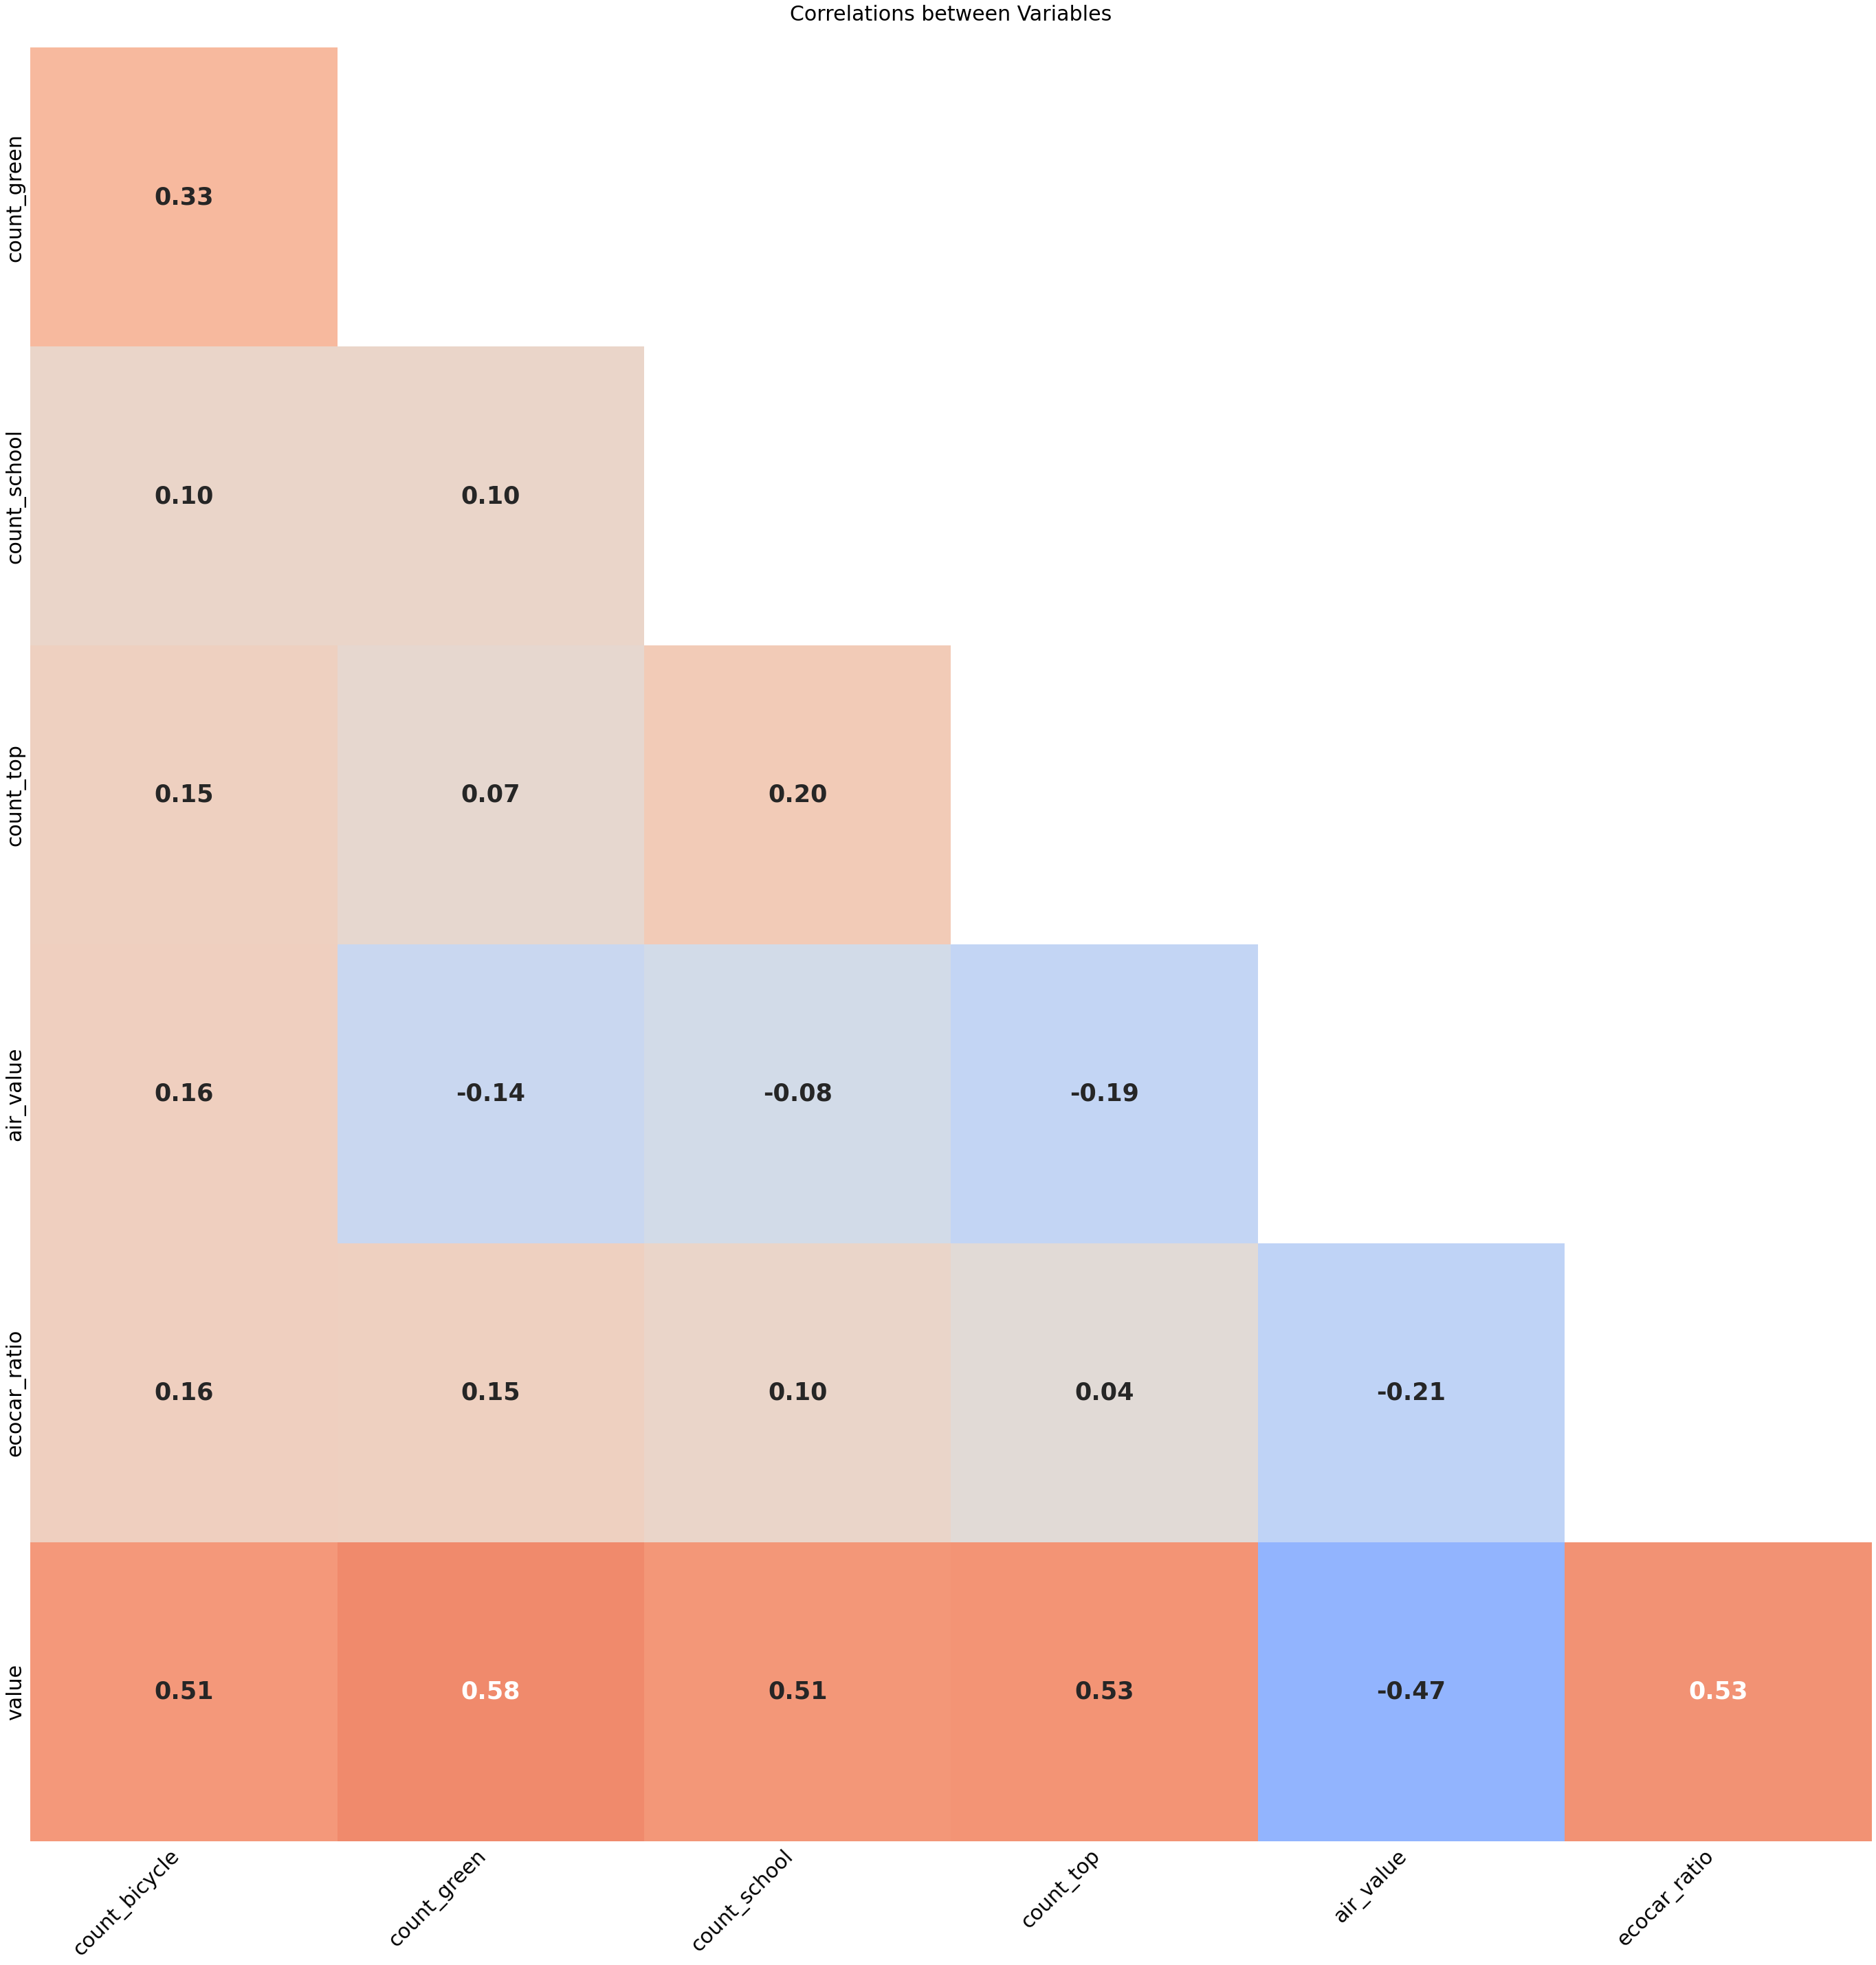

In [13]:
%matplotlib inline
corr = eco_norm.copy().corr() # standard 로 적용

mask=np.triu(np.ones_like(corr, dtype=bool))[1:,:-1]
corr=corr.iloc[1:,:-1].copy()

fig, ax = plt.subplots(figsize=(48,48))   
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', 
            cmap='coolwarm', annot_kws={'fontsize':35,'fontweight':'bold'}, cbar=False)
ax.tick_params(left=False,bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=30)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=30)
plt.title('Correlations between Variables\n', fontsize=30)
fig.show()

## standard 로 정규화

In [11]:
df_st = eco_df.copy()

In [12]:
scaler = StandardScaler()
data = scaler.fit_transform(df_st)
eco_norm = pd.DataFrame(data, index = list(df_st.index), columns=list(df_st.columns))
eco_norm["value"] = (eco_norm["count_bicycle"]+eco_norm["count_green"]+ 
                     eco_norm["count_school"]+eco_norm["count_top"]-eco_norm["air_value"]+eco_norm["ecocar_ratio"])
eco_st = eco_norm.copy()

In [14]:
# eco_norm[eco_norm["gd_nm"]=="강남구 대치1동"] -> k=4 인 경우 
eco_st.loc[["강남구 대치1동", "강남구 대치4동","강남구 역삼1동"]]

,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio,value
강남구 대치1동,-0.639875,-0.529458,1.158438,-0.721744,-0.842863,6.531647,6.641871
강남구 대치4동,-0.639875,0.161624,-0.317380,-0.105944,-0.842863,4.704231,4.645518
강남구 역삼1동,1.297608,1.198247,-0.317380,4.204653,-0.842863,2.700897,9.926887


In [45]:
# k= 5
## 클러스터 1번

goo = ['강서구 가양2동', '강서구 가양3동', '강서구 공항동', '금천구 독산2동', '금천구 독산3동',
       '금천구 독산4동', '강서구 등촌1동', '강서구 등촌2동', '강서구 방화1동', '금천구 시흥1동',
       '금천구 시흥2동', '금천구 시흥3동', '금천구 시흥4동', '금천구 시흥5동', '강서구 염창동',
       '강서구 우장산동', '강서구 화곡1동', '강서구 화곡2동', '강서구 화곡3동', '강서구 화곡4동',
       '강서구 화곡6동', '강서구 화곡8동', '강서구 화곡본동']
eco_st.loc[goo][["value"]].sort_values(["value"], ascending=False)

,value
강서구 방화1동,-0.377641
금천구 시흥1동,-0.818305
강서구 공항동,-1.095533
강서구 화곡6동,-1.265170
강서구 염창동,-1.404370
금천구 시흥4동,-1.504211
금천구 독산3동,-1.730562
강서구 우장산동,-2.417800
강서구 가양2동,-2.516096
강서구 등촌2동,-2.814850


In [46]:
# k= 5
## 클러스터 2번

goo = ['강남구 대치1동', '강남구 대치4동']
eco_st.loc[goo][["value"]].sort_values(["value"], ascending=False)

,value
강남구 대치1동,6.641871
강남구 대치4동,4.645518


In [35]:
eco_st.sort_values(["value"], ascending=False).head(10)

,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio,value
강남구 역삼1동,1.297608,1.198247,-0.317380,4.204653,-0.842863,2.700897,9.926887
동대문구 전농2동,0.190475,0.161624,2.634257,4.204653,-1.323498,-0.309387,8.205118
강남구 대치1동,-0.639875,-0.529458,1.158438,-0.721744,-0.842863,6.531647,6.641871
송파구 오륜동,1.712782,3.789806,1.158438,-0.721744,-0.024689,0.413020,6.376992
강남구 삼성1동,1.020824,1.025477,1.158438,1.741455,-0.842863,0.046049,5.835106
강서구 가양1동,5.449356,-0.183917,0.420529,-0.721744,1.556783,1.732433,5.139874
강남구 대치4동,-0.639875,0.161624,-0.317380,-0.105944,-0.842863,4.704231,4.645518
강남구 역삼2동,0.052083,0.852706,1.896348,0.509856,-0.842863,0.220270,4.374125
동대문구 용신동,0.744041,1.543789,-0.317380,1.125655,-1.323498,-0.410846,4.008756
송파구 풍납2동,0.467258,1.198247,1.158438,1.125655,-0.024689,-0.053604,3.920684


In [48]:
round(eco_st.describe(),5)

,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio,value
count,93.00000,93.00000,93.00000,93.00000,93.00000,93.00000,93.00000
mean,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000
std,1.00542,1.00542,1.00542,1.00542,1.00542,1.00542,3.14039
min,-1.19344,-0.87500,-1.05529,-0.72174,-1.32350,-0.77624,-5.29625
25%,-0.63988,-0.70223,-1.05529,-0.72174,-0.84286,-0.41397,-2.36505
50%,-0.36309,-0.35669,-0.31738,-0.10594,-0.02469,-0.23707,-0.18421
75%,0.19047,0.33439,0.42053,0.50986,0.66029,0.07841,2.07105
max,5.44936,3.78981,2.63426,4.20465,1.55678,6.53165,9.92689


## robust 정규화

In [12]:
df_st = eco_df.copy()

In [13]:
scaler = RobustScaler()
data = scaler.fit_transform(df_st)
eco_norm = pd.DataFrame(data, index = list(df_st.index), columns=list(df_st.columns))
eco_norm["value"] = (eco_norm["count_bicycle"]+eco_norm["count_green"]+ 
                     eco_norm["count_school"]+eco_norm["count_top"]-eco_norm["air_value"]+eco_norm["ecocar_ratio"])
eco_rb = eco_norm.copy()

In [14]:
# k = 2

eco_rb.loc[["강서구 가양1동" ,"강남구 대치1동", "강남구 대치2동","강남구 대치4동","강남구 역삼1동"]]

,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio,value
강서구 가양1동,7.000000,0.166667,0.5,-0.5,1.052103,4.000003,10.114566
강남구 대치1동,-0.333333,-0.166667,1.0,-0.5,-0.544305,13.747056,14.291361
강남구 대치2동,1.166667,1.666667,-0.5,0.0,-0.544305,4.987090,7.864728
강남구 대치4동,-0.333333,0.500000,0.0,0.0,-0.544305,10.035632,10.746604
강남구 역삼1동,2.000000,1.500000,0.0,3.5,-0.544305,5.966924,13.511229


In [50]:
# k = 3
## 0번 클러스터

goo = ['송파구 가락2동', '송파구 가락본동', '강서구 가양2동', '강서구 가양3동', '강남구 개포1동',
       '강남구 개포4동', '송파구 거여1동', '송파구 거여2동', '강남구 논현1동', '강남구 논현2동',
       '동대문구 답십리1동', '동대문구 답십리2동', '강남구 도곡1동', '강남구 도곡2동', '금천구 독산2동',
       '금천구 독산3동', '금천구 독산4동', '강서구 등촌1동', '강서구 등촌2동', '강서구 등촌3동',
       '송파구 마천1동', '송파구 마천2동', '송파구 문정1동', '송파구 방이1동', '송파구 방이2동',
       '강서구 방화3동', '강남구 삼성2동', '송파구 삼전동', '송파구 석촌동', '송파구 송파1동',
       '송파구 송파2동', '강남구 수서동', '금천구 시흥1동', '금천구 시흥2동', '금천구 시흥3동',
       '금천구 시흥4동', '금천구 시흥5동', '강남구 신사동', '강남구 압구정동', '강서구 염창동',
       '강서구 우장산동', '동대문구 이문1동', '동대문구 이문2동', '강남구 일원1동', '강남구 일원2동',
       '강남구 일원본동', '송파구 잠실4동', '송파구 잠실6동', '송파구 잠실7동', '송파구 잠실본동',
       '동대문구 장안1동', '동대문구 장안2동', '송파구 장지동', '동대문구 전농1동', '동대문구 전농2동',
       '동대문구 제기동', '강남구 청담동', '동대문구 청량리동', '송파구 풍납1동', '강서구 화곡1동',
       '강서구 화곡2동', '강서구 화곡3동', '강서구 화곡4동', '강서구 화곡6동', '강서구 화곡8동',
       '강서구 화곡본동', '동대문구 회기동', '동대문구 휘경1동', '동대문구 휘경2동']
eco_rb.loc[goo][["value"]].sort_values(["value"], ascending=False)

,value
동대문구 전농2동,2.494438
동대문구 장안1동,1.354274
동대문구 장안2동,1.307159
강남구 청담동,1.197576
강남구 수서동,1.103638
...,...
강서구 화곡4동,-0.719164
강서구 화곡3동,-0.735402
강서구 화곡2동,-0.748250
강서구 화곡1동,-0.791240


In [51]:
# k = 3
## 1번 클러스터

goo = ['송파구 가락1동', '금천구 가산동', '강서구 가양1동', '강남구 개포2동', '강서구 공항동',
       '강남구 대치2동', '금천구 독산1동', '송파구 문정2동', '강서구 발산1동', '강서구 방화1동',
       '강서구 방화2동', '강남구 삼성1동', '강남구 세곡동', '강남구 역삼1동', '강남구 역삼2동',
       '송파구 오금동', '송파구 오륜동', '동대문구 용신동', '송파구 위례동', '송파구 잠실2동',
       '송파구 잠실3동', '송파구 풍납2동']
eco_rb.loc[goo][["value"]].sort_values(["value"], ascending=False)

,value
강남구 역삼1동,2.328379
강남구 삼성1동,1.786390
송파구 오륜동,1.749305
강남구 역삼2동,1.577360
동대문구 용신동,1.435185
송파구 오금동,1.319464
송파구 풍납2동,1.317397
강남구 개포2동,1.251505
강남구 대치2동,1.120232
금천구 독산1동,1.014083


In [31]:
eco_rb[["value"]].sort_values(["value"], ascending=False).head(10)

,value
동대문구 전농2동,2.494438
강남구 역삼1동,2.328379
강남구 삼성1동,1.786390
송파구 오륜동,1.749305
강남구 대치1동,1.590537
강남구 역삼2동,1.577360
동대문구 용신동,1.435185
동대문구 장안1동,1.354274
송파구 오금동,1.319464
송파구 풍납2동,1.317397


In [18]:
eco_rb.describe()

,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio,value
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,0.437276,0.344086,0.215054,0.086022,0.016425,0.481487,1.547499
std,1.210839,0.969899,0.681263,0.816353,0.668874,2.041977,3.530712
min,-1.000000,-0.500000,-0.500000,-0.500000,-0.864056,-1.095023,-3.664134
25%,-0.333333,-0.333333,-0.500000,-0.500000,-0.544305,-0.359268,-1.052103
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.072283
75%,0.666667,0.666667,0.500000,0.500000,0.455695,0.640732,2.971201
max,7.000000,4.000000,2.000000,3.500000,1.052103,13.747056,14.291361


## MinMax 정규화

In [26]:
df_st = eco_df.copy()

In [71]:
scaler = MinMaxScaler()
data = scaler.fit_transform(df_st)
eco_norm = pd.DataFrame(data, index = list(df_st.index), columns=list(df_st.columns))
eco_norm["value"] = (eco_norm["count_bicycle"]+eco_norm["count_green"]+ 
                     eco_norm["count_school"]+eco_norm["count_top"]-eco_norm["air_value"]+eco_norm["ecocar_ratio"])
eco_mm = eco_norm.copy()

In [28]:
# n=2

goo = ['송파구 가락본동', '강남구 개포1동', '강남구 개포2동', '강남구 개포4동', '강남구 논현2동', '동대문구 답십리1동', '동대문구 답십리2동', '강남구 도곡2동', '강서구 등촌3동', '송파구 문정1동', '송파구 방이1동', '강서구 방화3동', '강남구 삼성1동', '강남구 삼성2동', '송파구 송파2동', '강남구 수서동', '강남구 신사동', '강남구 역삼2동', '송파구 오금동', '동대문구 용신동', '동대문구 이문1동', '동대문구 이문2동', '강남구 일원2동', '강남구 일원본동', '송파구 잠실본동', '동대문구 장안1동', '동대문구 장안2동', '동대문구 전농1동', '동대문구 전농2동', '동대문구 제기동', '강남구 청담동', '동대문구 청량리동', '송파구 풍납2동', '동대문구 휘경2동'
]
eco_mm.loc[goo][["value"]].sort_values(["value"], ascending=False)

,value
동대문구 전농2동,2.494438
강남구 삼성1동,1.786390
강남구 역삼2동,1.577360
동대문구 용신동,1.435185
동대문구 장안1동,1.354274
송파구 오금동,1.319464
송파구 풍납2동,1.317397
동대문구 장안2동,1.307159
강남구 개포2동,1.251505
강남구 청담동,1.197576


In [29]:
# n=3
goo = ['금천구 가산동', '강서구 가양1동', '강서구 가양2동', '강서구 가양3동', '강서구 공항동', '금천구 독산2동', '금천구 독산3동', '금천구 독산4동', '강서구 등촌1동', '강서구 등촌2동', '강서구 등촌3동', '강서구 발산1동', '강서구 방화1동', '강서구 방화2동', '강서구 방화3동', '금천구 시흥1동', '금천구 시흥2동', '금천구 시흥3동', '금천구 시흥4동', '금천구 시흥5동', '강서구 염창동', '강서구 우장산동', '강서구 화곡1동', '강서구 화곡2동', '강서구 화곡3동', '강서구 화곡4동', '강서구 화곡6동', '강서구 화곡8동', '강서구 화곡본동']

eco_mm.loc[goo][["value"]].sort_values(["value"], ascending=False)

,value
강서구 가양1동,0.891431
금천구 가산동,0.692297
강서구 등촌3동,0.633664
강서구 발산1동,0.542729
강서구 방화2동,0.531935
강서구 방화3동,0.398130
금천구 시흥1동,0.200783
강서구 방화1동,0.176671
금천구 독산3동,0.143968
강서구 화곡6동,0.041705


In [30]:
eco_mm.describe()

,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio,value
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,0.179659,0.187575,0.286022,0.146505,0.459503,0.106219,0.446477
std,0.151355,0.215533,0.272505,0.204088,0.349070,0.137580,0.706591
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.860191
25%,0.083333,0.037037,0.000000,0.000000,0.166871,0.049572,-0.085096
50%,0.125000,0.111111,0.200000,0.125000,0.450931,0.073778,0.433580
75%,0.208333,0.259259,0.400000,0.250000,0.688748,0.116948,0.916505
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.494438


## 0~1 지수 시각화

https://github.com/ChoiSeEun/SISO/blob/main/3.%EA%B3%B5%EC%9B%90%EC%A0%90%EC%88%98%EA%B3%84%EC%82%B0/%EB%8F%99%EB%8C%80%EB%AC%B8%EA%B5%AC_%EA%B3%B5%EC%9B%90%EC%A0%90%EC%88%98%20%EA%B3%84%EC%82%B0.ipynb

In [64]:
st_4 = eco_st.loc[["강남구 대치1동", "강남구 대치4동","강남구 역삼1동"]]
st_4 = st_4.reset_index()

df = st_4.copy()
df = df.rename(columns={"index":"행정동"})
df.describe()

,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio,value
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.005952,0.276804,0.174559,1.125655,-0.842863,4.645592,7.071426
std,1.118606,0.869593,0.852064,2.684208,0.000000,1.916048,2.666759
min,-0.639875,-0.529458,-0.317380,-0.721744,-0.842863,2.700897,4.645518
25%,-0.639875,-0.183917,-0.317380,-0.413844,-0.842863,3.702564,5.643695
50%,-0.639875,0.161624,-0.317380,-0.105944,-0.842863,4.704231,6.641871
75%,0.328866,0.679936,0.420529,2.049354,-0.842863,5.617939,8.284379
max,1.297608,1.198247,1.158438,4.204653,-0.842863,6.531647,9.926887


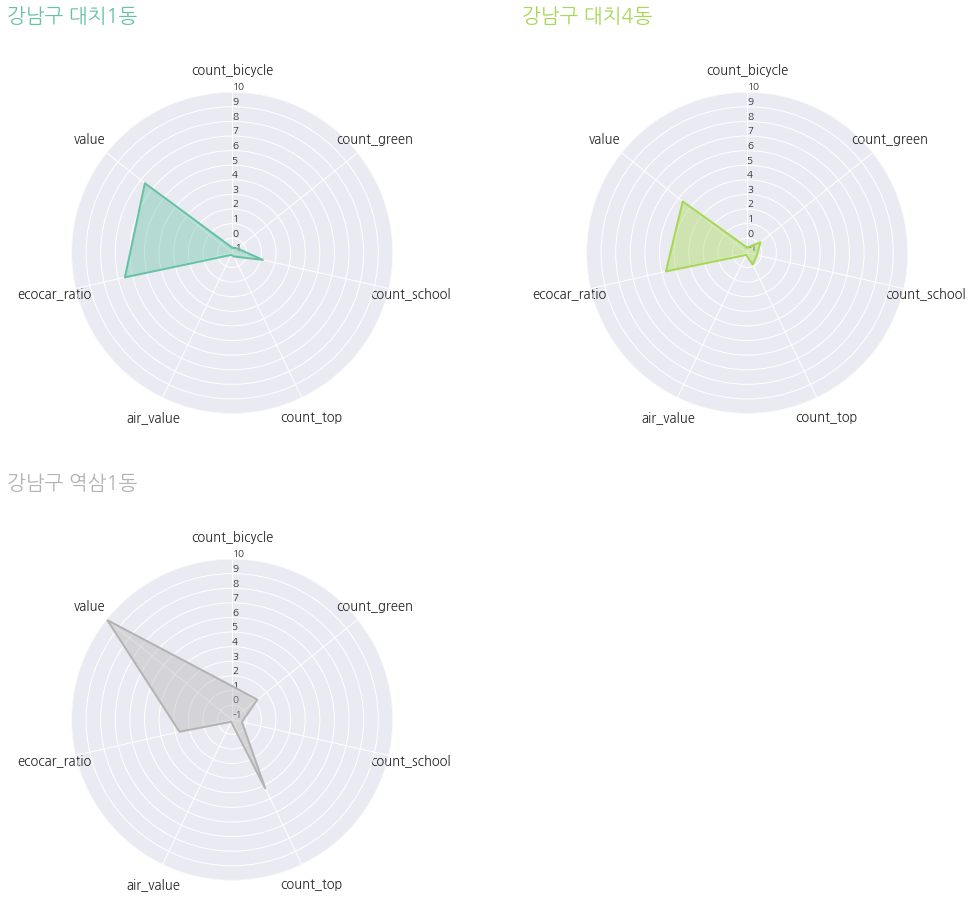

In [67]:

## 따로 그리기
labels = df.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')
 
for i, row in df.iterrows():
    color = my_palette(i)
    data = df.iloc[i].drop('행정동').tolist()
    data += data[:1]
    
    ax = plt.subplot(3,2,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],["-1", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"], fontsize=10) ## y축 눈금 설정
    plt.ylim(-1,10)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
   
    plt.title(row.행정동, size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
 
plt.tight_layout(pad=5) ## subplot간 패딩 조절
plt.show()

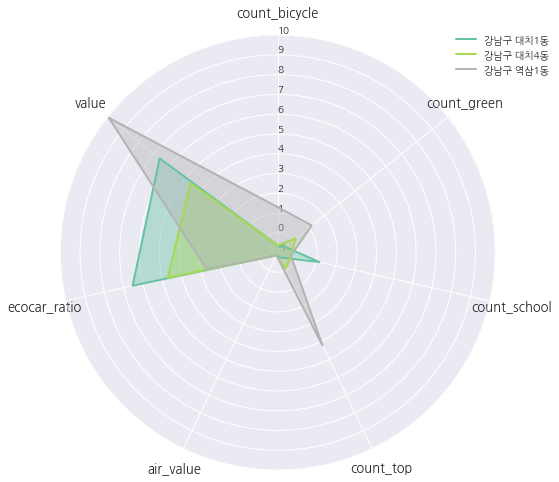

In [69]:
## 하나로 합치기
labels = df.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot(polar=True)
for i, row in df.iterrows():
    color = my_palette(i)
    data = df.iloc[i].drop("행정동").tolist()    
    data += data[:1]
    
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## 각도 축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## 각 축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## 반지름 축 눈금 라벨 각도 설정(degree 단위)
    
    ## y축 눈금 설정    plt.ylim(0,1)
    plt.yticks([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],["-1", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"], fontsize=10) 
    plt.ylim(-1,10)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=row.행정동) ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
plt.legend(loc=(0.9,0.9))
plt.show()

### 시각화 2

In [75]:
scaler = MinMaxScaler()
data = scaler.fit_transform(df_st)
eco_norm = pd.DataFrame(data, index = list(df_st.index), columns=list(df_st.columns))
eco_norm["value"] = (eco_norm["count_bicycle"]+eco_norm["count_green"]+ 
                     eco_norm["count_school"]+eco_norm["count_top"]-eco_norm["air_value"]+eco_norm["ecocar_ratio"])
eco_mm = eco_norm.copy()
eco_mm.sort_values(["value"], ascending=False).head(3)

,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio,value
동대문구 전농2동,0.208333,0.222222,1.0,1.0,0.000000,0.063883,2.494438
강남구 역삼1동,0.375000,0.444444,0.2,1.0,0.166871,0.475806,2.328379
강남구 삼성1동,0.333333,0.407407,0.6,0.5,0.166871,0.112520,1.786390


In [77]:
mm = eco_mm.sort_values(["value"], ascending=False).head(3)
mm = mm.reset_index()

df = mm.copy()
df = df.rename(columns={"index":"행정동"})
df = df.drop(columns={"value"})
df

,행정동,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio
0,동대문구 전농2동,0.208333,0.222222,1.0,1.0,0.000000,0.063883
1,강남구 역삼1동,0.375000,0.444444,0.2,1.0,0.166871,0.475806
2,강남구 삼성1동,0.333333,0.407407,0.6,0.5,0.166871,0.112520


In [79]:
eco_mm.describe()

,count_bicycle,count_green,count_school,count_top,air_value,ecocar_ratio,value
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,0.179659,0.187575,0.286022,0.146505,0.459503,0.106219,0.446477
std,0.151355,0.215533,0.272505,0.204088,0.349070,0.137580,0.706591
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.860191
25%,0.083333,0.037037,0.000000,0.000000,0.166871,0.049572,-0.085096
50%,0.125000,0.111111,0.200000,0.125000,0.450931,0.073778,0.433580
75%,0.208333,0.259259,0.400000,0.250000,0.688748,0.116948,0.916505
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.494438


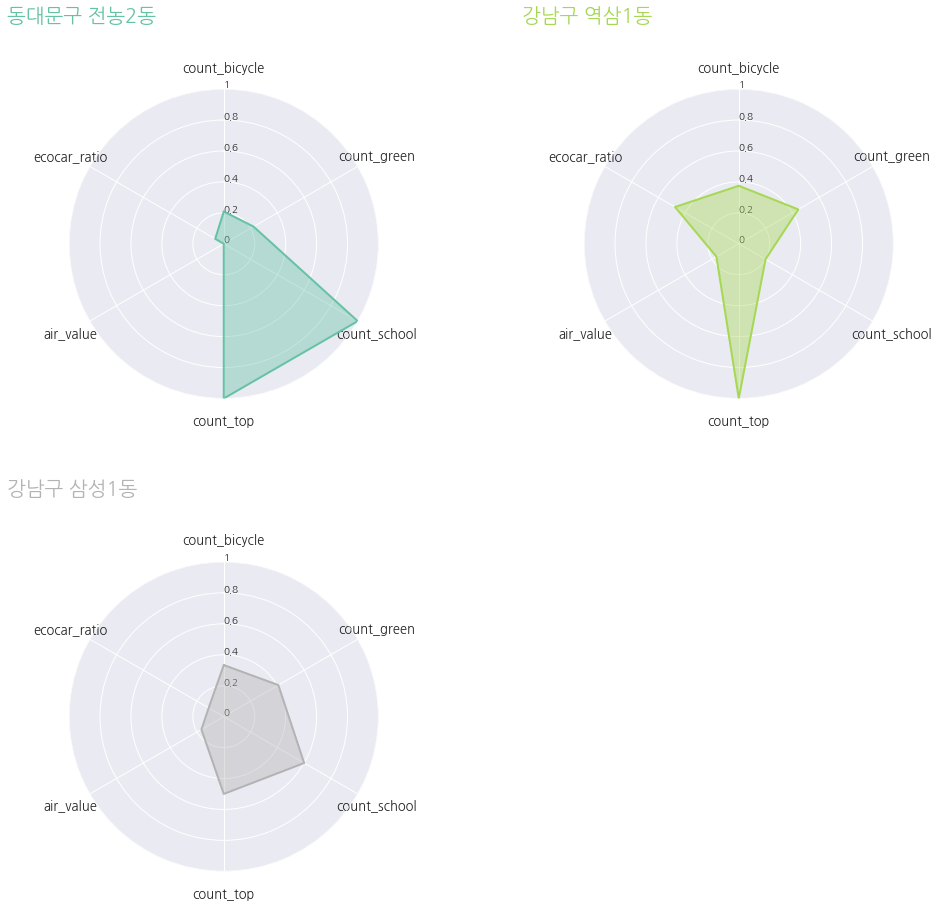

In [78]:
## 따로 그리기
labels = df.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')
 
for i, row in df.iterrows():
    color = my_palette(i)
    data = df.iloc[i].drop('행정동').tolist()
    data += data[:1]
    
    ax = plt.subplot(3,2,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0,0.2,0.4,0.6,0.8,1],['0','0.2','0.4','0.6','0.8','1'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,1)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
   
    plt.title(row.행정동, size=20, color=color,x=-0.2, y=1.2, ha='left') ## 타이틀은 캐릭터 클래스로 한다.
 
plt.tight_layout(pad=5) ## subplot간 패딩 조절
plt.show()

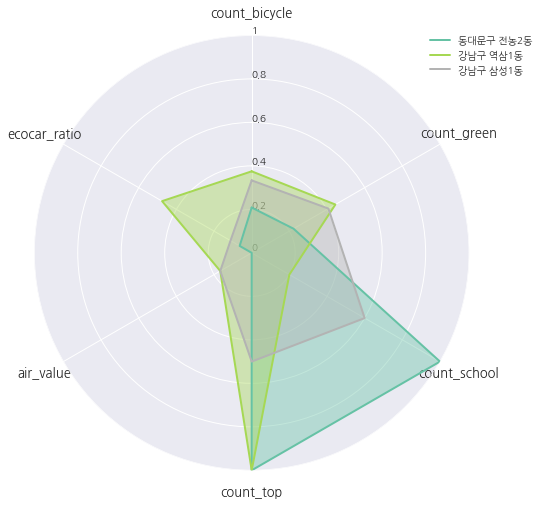

In [80]:
## 하나로 합치기
labels = df.columns[1:]
num_labels = len(labels)
    
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot(polar=True)
for i, row in df.iterrows():
    color = my_palette(i)
    data = df.iloc[i].drop('행정동').tolist()
    data += data[:1]
    
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## 각도 축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## 각 축과 눈금 사이에 여백을 준다.
 
    ax.set_rlabel_position(0) ## 반지름 축 눈금 라벨 각도 설정(degree 단위)
    plt.yticks([0,0.2,0.4,0.6,0.8,1],['0','0.2','0.4','0.6','0.8','1'], fontsize=10) ## 반지름 축 눈금 설정
    plt.ylim(0,1)

    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=row.행정동) ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
plt.legend(loc=(0.9,0.9))
plt.show()